<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Smallest_Substring_Containing_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smallest Substring Containing

You're given two non-empty strings: a big string and a small string. Write a function that returns the smallest substring in the big string that contains all of the small string's characters.

Note that:

- The substring can contain other characters not found in the small string.
- The characters in the substring don't have to be in the same order as they appear in the small string.
- If the small string has duplicate characters, the substring has to contain those duplicate characters (it can also contain more, but not fewer).

You can assume that there will only be one relevant smallest substring.

Sample Input

```
bigString = "abcd$ef$axb$c$"
smallString = "$$abf"
```



Sample Output

```
"f$axb$"
```



# Solution 1

In [1]:
# Time O(B + S) ===> However, becasue B > S. 
# So, ===> Time O(B) <====
# O(S) : for the first small string couter
# O(B) : for the loop right_idx and left_idx

# Space O(min(B, S) + S) ===> However, becasue B > S. ===> So, O(S)
# O(S) : store char count of small string (small_string_count)
# O(min(B, S)) : store char count of big string (substring_count). 
#                It shoud be min(B, S) becasue it will store only char that in both small string and big string
#                Thus, becasue B > S.
# So, ===> Time O(S) <====

# B = no of element in big_string
# S = no of element in small_string

def smallestSubstringContaining(bigString, smallString):
  small_string_count = count_character(smallString)
  total_unique_char = len(small_string_count)
  completed_unique_char = 0
  lenght_of_smallest_substring = float('inf')
  left_idx_of_smallest_substring = None
  right_idx_of_smallest_substring = None
  right_idx = 0
  left_idx = 0
  big_string_count = {}
  right_move = True
  while right_idx < len(bigString):
    if right_move:
      current_char = bigString[right_idx]
      if current_char in small_string_count:
        increase_char_count(current_char, big_string_count)

        if big_string_count[current_char] == small_string_count[current_char]:
          completed_unique_char += 1
    else:
      current_char = bigString[left_idx - 1]
      if current_char in big_string_count:
        decrease_char_count(current_char, big_string_count)
        if big_string_count[current_char] == small_string_count[current_char] - 1:
          completed_unique_char -= 1
    
    if completed_unique_char == total_unique_char:
      lenght_of_current_substring = right_idx - left_idx + 1
      if lenght_of_current_substring < lenght_of_smallest_substring:
        lenght_of_smallest_substring = lenght_of_current_substring
        left_idx_of_smallest_substring = left_idx
        right_idx_of_smallest_substring = right_idx

      right_move = False
      left_idx += 1
    else:
      right_move =True
      right_idx += 1

  if left_idx_of_smallest_substring == None:
    return ''

  return bigString[left_idx_of_smallest_substring:right_idx_of_smallest_substring+1]

def increase_char_count(char, char_count):
  if char not in char_count:
    char_count[char] = 0
  char_count[char] += 1

def decrease_char_count(char, char_count):
  char_count[char] -= 1

def count_character(string):
  counter = {}
  for s in string:
    if s not in counter:
      counter[s] = 0
    counter[s] += 1
  return counter

# Solution 2: same algorithm. Just refactoring the code for more readability

In [2]:
# Time O(B + S) ===> However, becasue B > S. 
# So, ===> Time O(B) <====
# O(S) : for the first small string couter
# O(B) : for the loop right_idx and left_idx

# Space O(min(B, S) + S) ===> However, becasue B > S. ===> So, O(S)
# O(S) : store char count of small string (small_string_count)
# O(min(B, S)) : store char count of big string (substring_count). 
#                It shoud be min(B, S) becasue it will store only char that in both small string and big string
#                Thus, becasue B > S.
# So, ===> Time O(S) <====

# B = no of element in big_string
# S = no of element in small_string

def smallestSubstringContaining(bigString, smallString):
  small_string_count = count_character(smallString)
  total_unique_char = len(small_string_count)
  completed_unique_char = 0
  substring_bound = [0, float('inf')]
  right_idx = 0
  left_idx = 0
  substring_count = {}

  while right_idx < len(bigString):
    right_char = bigString[right_idx]
    if right_char not in small_string_count:
      right_idx += 1
      continue

    increase_char_count(right_char, substring_count)
    if substring_count[right_char] == small_string_count[right_char]:
      completed_unique_char += 1

    # move left_idx if completed_unique_char == total_unique_char
    while completed_unique_char == total_unique_char and left_idx <= right_idx:
      substring_bound = get_smaller_bound(left_idx, right_idx, substring_bound[0], substring_bound[1])
      left_char = bigString[left_idx]
      if left_char not in small_string_count:
        left_idx += 1
        continue
      if substring_count[left_char] == small_string_count[left_char]:
        completed_unique_char -= 1
      decrease_char_count(left_char, substring_count)
      left_idx += 1

    right_idx += 1

  return get_string_from_bound(bigString, substring_bound)

def get_string_from_bound(string, bound):
  start, end = bound
  if end == float('inf'):
    return ''
  return string[start:end + 1]

def get_smaller_bound(left_idx1, right_idx1, left_idx2, right_idx2):
  return [left_idx1, right_idx1] if right_idx1 - left_idx1 < right_idx2 - left_idx2 else [left_idx2, right_idx2]

def increase_char_count(char, char_count):
  if char not in char_count:
    char_count[char] = 0
  char_count[char] += 1

def decrease_char_count(char, char_count):
  char_count[char] -= 1

def count_character(string):
  counter = {}
  for s in string:
    if s not in counter:
      counter[s] = 0
    counter[s] += 1
  return counter

In [3]:
bigString = "abcd$ef$axb$c$"
smallString = "$$abf"
smallestSubstringContaining(bigString, smallString)

'f$axb$'

In [4]:
bigString = 'aaaa+a$+aaa++$+++++++aaa'
smallString = 'a+$aaAaaaa$++'
smallestSubstringContaining(bigString, smallString)

''

In [5]:
bigString = "$$abfabcd$ef$axb$c$"
smallString = "$$abf"
smallestSubstringContaining(bigString, smallString)

'$$abf'

# Conceptual Note

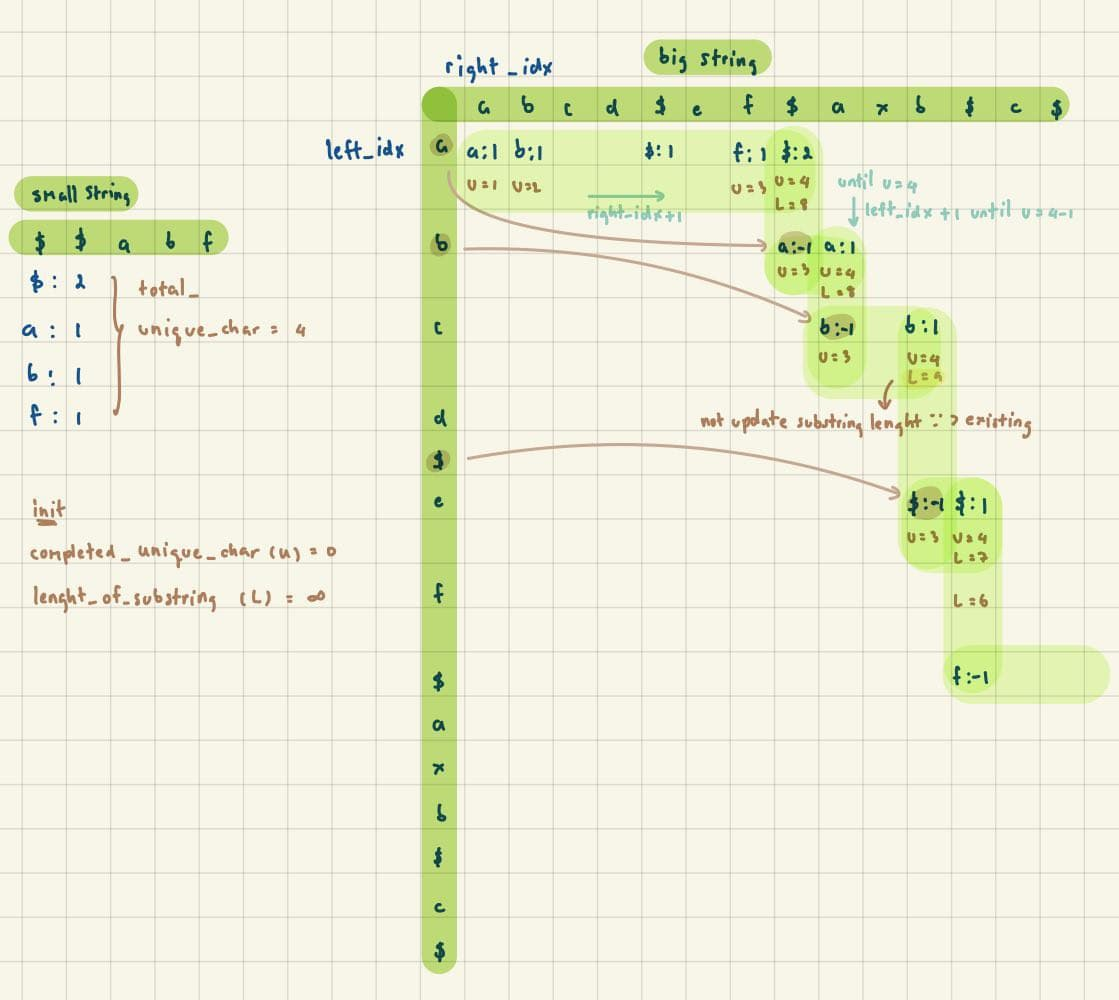